<a href="https://colab.research.google.com/github/aniishap/ds2002/blob/main/project2part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Ingestion & Analysis

In [13]:
!pip install timedelta


In [45]:
import sqlite3
import requests
import json
import time
from datetime import datetime
import time
import pandas as pd
import timedelta
conn = sqlite3.connect('finalprojectapi.db')
cursor = conn.cursor()

## Data Ingestion Process

In [46]:
# create the table & columns
def create_table(cursor):
    create_api_table_query = """
    CREATE TABLE IF NOT EXISTS api
    (
        time TEXT PRIMARY KEY,
        factor INTEGER,
        pi FLOAT
    )
    """
    cursor.execute(create_api_table_query)
# insert api extracted data into respective columns
def load_data(cursor, data):
    load_apidata_query = """
    INSERT INTO api (factor, pi, time) VALUES (?, ?, ?)
    """
    cursor.execute(load_apidata_query, (data['factor'], data['pi'], data['time']))

# make calls to an api retreiving data once per minute for 60 minutues, whilst
# loading it into the database
def get_api_response(cursor, url):
    start_timestamp = time.time()
    api_list = []  # store api data in list
    for i in range(60):
        try:
            response = requests.get(url)
            response.raise_for_status()
            api_data = response.json()
            current_time = start_timestamp + i * 60
            load_data(cursor, {'factor': api_data['factor'], 'pi': api_data['pi'], 'time': api_data['time']})
            api_list.append({'time': api_data['time'], 'factor': api_data['factor'], 'pi': api_data['pi']})
            print("Time that data was entered:", datetime.fromtimestamp(current_time)) # print the time data loaded from the API
            time_difference = time.time() - start_timestamp
            consecutive_time_entry = (i + 1) * 60 - time_difference  # this ensures that the elapsed time is exactly 60 seconds
            if consecutive_time_entry > 0:
                time.sleep(consecutive_time_entry)
        except requests.exceptions.RequestException as err:
            print("An error occurred:", err)
    # list to df
    df = pd.DataFrame(api_list)
    df['time'] = pd.to_datetime(df['time'])
    return df

api_url = "https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi"

create_table(cursor)
df = get_api_response(cursor, api_url)

conn.commit()
conn.close()

print("DataFrame from the database:")
print(df)


Time that data was entered: 2024-05-07 21:13:43.428231
Time that data was entered: 2024-05-07 21:14:43.428231
Time that data was entered: 2024-05-07 21:15:43.428231
Time that data was entered: 2024-05-07 21:16:43.428231
Time that data was entered: 2024-05-07 21:17:43.428231
Time that data was entered: 2024-05-07 21:18:43.428231
Time that data was entered: 2024-05-07 21:19:43.428231
Time that data was entered: 2024-05-07 21:20:43.428231
Time that data was entered: 2024-05-07 21:21:43.428231
Time that data was entered: 2024-05-07 21:22:43.428231
Time that data was entered: 2024-05-07 21:23:43.428231
Time that data was entered: 2024-05-07 21:24:43.428231
Time that data was entered: 2024-05-07 21:25:43.428231
Time that data was entered: 2024-05-07 21:26:43.428231
Time that data was entered: 2024-05-07 21:27:43.428231
Time that data was entered: 2024-05-07 21:28:43.428231
Time that data was entered: 2024-05-07 21:29:43.428231
Time that data was entered: 2024-05-07 21:30:43.428231
Time that 

## Verify functionality of database

In [48]:
conn = sqlite3.connect('finalprojectapi.db')
cursor = conn.cursor()
select_table_query = "SELECT * FROM api"
cursor.execute(select_table_query)
rows = cursor.fetchall()
for row in rows:
    print(row)
cursor.close()
conn.close()


('2024-05-07 21:13:44', 2197, 3.142047819701858)
('2024-05-07 21:14:44', 2744, 3.1412282221150143)
('2024-05-07 21:15:44', 3375, 3.14188894987959)
('2024-05-07 21:16:44', 4096, 3.141348512968434)
('2024-05-07 21:17:44', 4913, 3.1417961952119438)
('2024-05-07 21:18:43', 5832, 3.141421185826989)
('2024-05-07 21:19:44', 6859, 3.141738447436511)
('2024-05-07 21:20:44', 8000, 3.141467653590268)
('2024-05-07 21:21:44', 9261, 3.141700633289284)
('2024-05-07 21:22:44', 10648, 3.141498739239878)
('2024-05-07 21:23:43', 12167, 3.141674843118693)
('2024-05-07 21:24:44', 13824, 3.141520315626915)
('2024-05-07 21:25:44', 15625, 3.141656653589722)
('2024-05-07 21:26:43', 17576, 3.1415357578228837)
('2024-05-07 21:27:44', 19683, 3.1416434588531876)
('2024-05-07 21:28:43', 21952, 3.141547099653953)
('2024-05-07 21:29:44', 24389, 3.1416336556808755)
('2024-05-07 21:30:44', 27000, 3.1415556165527665)
('2024-05-07 21:31:43', 29791, 3.1416262207744947)
('2024-05-07 21:32:44', 32768, 3.1415621360116797)
('

## Analysis of Data

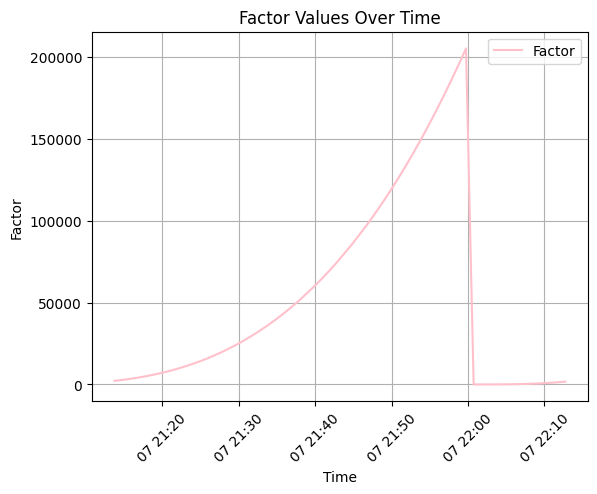

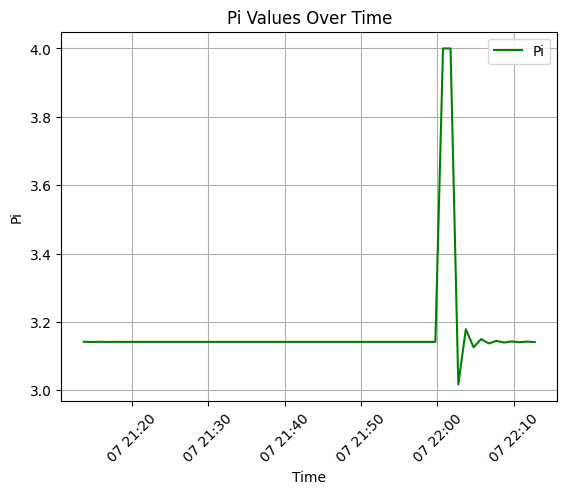

In [55]:
import matplotlib.pyplot as plt

conn = sqlite3.connect('finalprojectapi.db')
cursor = conn.cursor()

query = "SELECT factor, pi, time FROM api"
cursor.execute(query)
rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=['factor', 'pi', 'time'])
df['time'] = pd.to_datetime(df['time'])

plt.plot(df['time'], df['factor'], label='Factor', color='pink')
plt.xlabel('Time')
plt.ylabel('Factor')
plt.title('Factor Values Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.plot(df['time'], df['pi'], label='Pi', color='green')
plt.xlabel('Time')
plt.ylabel('Pi')
plt.title('Pi Values Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


conn.close()

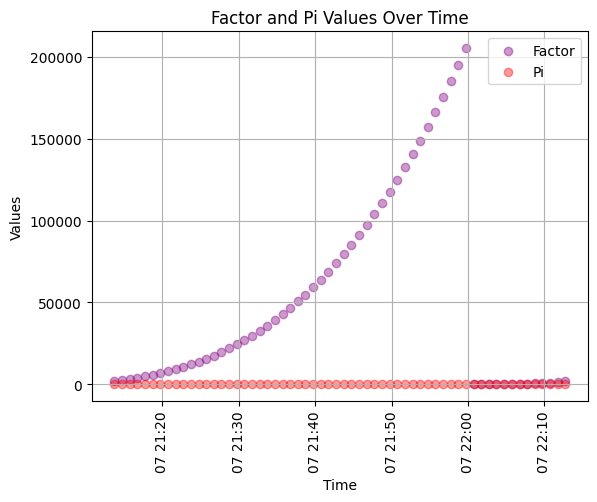

In [57]:
plt.scatter(df['time'], df['factor'], label='Factor', color='purple', alpha=0.4)
plt.scatter(df['time'], df['pi'], label='Pi', color='red', alpha=0.4)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Factor and Pi Values Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()